In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from matplotlib.colors import colorConverter, ListedColormap 
# 对于上面的fit可以这么扩展变成动态的
from sklearn.preprocessing import OneHotEncoder

In [3]:
def onehot(y,start,end):
    ohe = OneHotEncoder()
    a = np.linspace(start,end-1,end-start)
    b =np.reshape(a,[-1,1]).astype(np.int32)
    ohe.fit(b)
    c=ohe.transform(y).toarray()  
    return c  

def generate(sample_size, num_classes, diff,regression=False):
    np.random.seed(10)
    mean = np.random.randn(2)
    cov = np.eye(2)  
    
    #len(diff)
    samples_per_class = int(sample_size/num_classes)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)
    
        X0 = np.concatenate((X0,X1))
        Y0 = np.concatenate((Y0,Y1))
        #print(X0, Y0)
    
    if regression==False: #one-hot  0 into the vector "1 0
        Y0 = np.reshape(Y0,[-1,1])        
        #print(Y0.astype(np.int32))
        Y0 = onehot(Y0.astype(np.int32),0,num_classes)
        #print(Y0)
    X, Y = shuffle(X0, Y0)
    #print(X, Y)
    return X,Y    

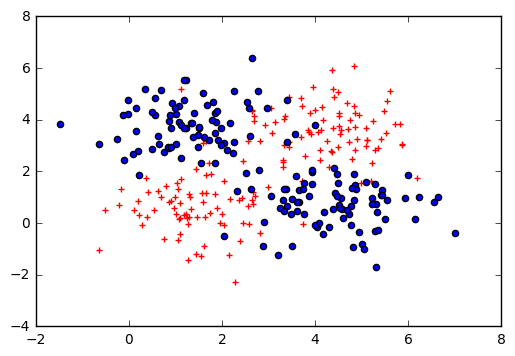

In [4]:
# 1.构建异或数据集
np.random.seed(10)

input_dim = 2
num_classes = 4
X,Y = generate(320, num_classes, [[3.0,0],[3.0,3.0],[0,3.0]], True)
Y = Y%2

xr = []
xb = []
for (l,k) in zip(Y[:], X[:]):
    if l == 0.0:
        xr.append([k[0], k[1]])
    else:
        xb.append([k[0], k[1]])
xr = np.array(xr)
xb = np.array(xb)
plt.scatter(xr[:,0], xr[:,1], c='r', marker='+')
plt.scatter(xb[:,0], xb[:,1], c='b', marker='o')
plt.show()

Step: 0 Current loss: 0.45030928
Step: 1000 Current loss: 0.10544463
Step: 2000 Current loss: 0.088099025
Step: 3000 Current loss: 0.07855197
Step: 4000 Current loss: 0.07290867
Step: 5000 Current loss: 0.069543526
Step: 6000 Current loss: 0.067578174
Step: 7000 Current loss: 0.06634475
Step: 8000 Current loss: 0.065408185
Step: 9000 Current loss: 0.06416238
Step: 10000 Current loss: 0.062840186
Step: 11000 Current loss: 0.061411284
Step: 12000 Current loss: 0.05992625
Step: 13000 Current loss: 0.058570027
Step: 14000 Current loss: 0.05718384
Step: 15000 Current loss: 0.05596236
Step: 16000 Current loss: 0.05488777
Step: 17000 Current loss: 0.053657793
Step: 18000 Current loss: 0.052476894
Step: 19000 Current loss: 0.051191173


D:\java_dev\Anaconda3.5\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\java_dev\Anaconda3.5\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


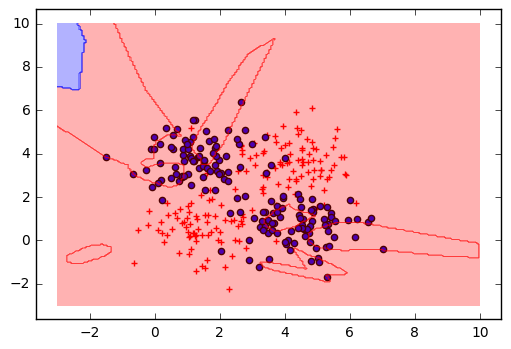

In [6]:
# 2.修改定义网络模型
Y=np.reshape(Y,[-1,1])

learning_rate = 1e-4
n_input  = 2
n_label  = 1
#n_hidden = 2#欠拟合
n_hidden = 200#过拟合


x = tf.placeholder(tf.float32, [None,n_input])
y = tf.placeholder(tf.float32, [None, n_label])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden], stddev=0.1)),
    'h2': tf.Variable(tf.random_normal([n_hidden, n_label], stddev=0.1))
	} 
biases = {
    'h1': tf.Variable(tf.zeros([n_hidden])),
    'h2': tf.Variable(tf.zeros([n_label]))
    }    


layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['h1']))
#y_pred = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['h2']),biases['h2']))
#y_pred = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']),biases['h2']))#局部最优解

#y_pred = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']),biases['h2']))

#Leaky relus  40000次 ok
layer2 =tf.add(tf.matmul(layer_1, weights['h2']),biases['h2'])
y_pred = tf.maximum(layer2,0.01*layer2)
 
 
loss=tf.reduce_mean((y_pred-y)**2)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

#加载
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
    
for i in range(20000):#  
  
  _, loss_val = sess.run([train_step, loss], feed_dict={x: X, y: Y})

  if i % 1000 == 0:
    print ("Step:", i, "Current loss:", loss_val)

#colors = ['r' if l == 0.0 else 'b' for l in Y[:]]
#plt.scatter(X[:,0], X[:,1], c=colors)
xr=[]
xb=[]
for(l,k) in zip(Y[:],X[:]):
    if l == 0.0 :
        xr.append([k[0],k[1]])        
    else:
        xb.append([k[0],k[1]])
xr =np.array(xr)
xb =np.array(xb)      
plt.scatter(xr[:,0], xr[:,1], c='r',marker='+')
plt.scatter(xb[:,0], xb[:,1], c='b',marker='o')

    
nb_of_xs = 200
xs1 = np.linspace(-3, 10, num=nb_of_xs)
xs2 = np.linspace(-3, 10, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i,j] = sess.run(y_pred, feed_dict={x: [[ xx[i,j], yy[i,j] ]]} )
        classification_plane[i,j] = int(classification_plane[i,j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show() 


loss:
 0.104187526


D:\java_dev\Anaconda3.5\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\java_dev\Anaconda3.5\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


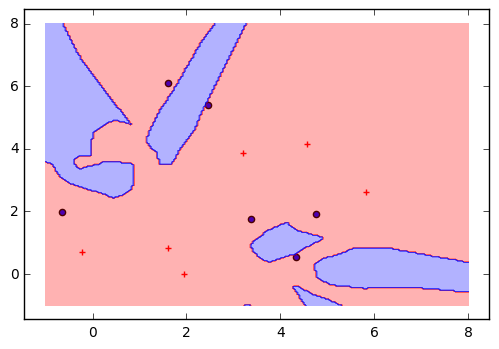

In [7]:
# 6.验证过拟合
xTrain, yTrain = generate(12,num_classes,  [[3.0,0],[3.0,3.0],[0,3.0]],True)
yTrain=yTrain%2
#colors = ['r' if l == 0.0 else 'b' for l in yTrain[:]]
#plt.scatter(xTrain[:,0], xTrain[:,1], c=colors)

xr=[]
xb=[]
for(l,k) in zip(yTrain[:],xTrain[:]):
    if l == 0.0 :
        xr.append([k[0],k[1]])        
    else:
        xb.append([k[0],k[1]])
xr =np.array(xr)
xb =np.array(xb)      
plt.scatter(xr[:,0], xr[:,1], c='r',marker='+')
plt.scatter(xb[:,0], xb[:,1], c='b',marker='o')


#plt.show() 
yTrain=np.reshape(yTrain,[-1,1])           
print ("loss:\n", sess.run(loss, feed_dict={x: xTrain, y: yTrain}))          

nb_of_xs = 200
xs1 = np.linspace(-1, 8, num=nb_of_xs)
xs2 = np.linspace(-1, 8, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i,j] = sess.run(y_pred, feed_dict={x: [[ xx[i,j], yy[i,j] ]]} )
        classification_plane[i,j] = int(classification_plane[i,j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show()   